In [1]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import CrostonSBA, CrostonClassic
from sbc import sbc_class
from matplotlib.patches import Rectangle

In [14]:
data = pd.read_csv("tests/data/sales_train_clean.csv")
# data['Date'] = pd.to_datetime(data['Date'])

In [15]:
data

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,HOUSEHOLD_2_516_CA_1_evaluation,HOUSEHOLD_2_516_CA_2_evaluation,HOUSEHOLD_2_516_CA_3_evaluation,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516_TX_1_evaluation,HOUSEHOLD_2_516_TX_2_evaluation,HOUSEHOLD_2_516_TX_3_evaluation,HOUSEHOLD_2_516_WI_1_evaluation,HOUSEHOLD_2_516_WI_2_evaluation,HOUSEHOLD_2_516_WI_3_evaluation
0,2011-01-29,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,2011-01-30,0,0,2,1,1,0,0,2,0,...,1,0,1,0,0,1,0,0,0,1
2,2011-01-31,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-02-01,1,0,1,1,0,2,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,2011-02-02,4,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,0,0,1,1,0,1,0,0,4,...,0,1,0,0,0,0,0,0,0,0
1937,2016-05-19,1,0,0,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1938,2016-05-20,0,1,3,0,2,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
1939,2016-05-21,0,2,2,0,0,0,0,1,0,...,0,3,0,0,0,0,1,0,0,0


In [16]:
data.loc[:, ~data.columns.isin(['date'])]

,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,FOODS_1_001_WI_3_evaluation,...,HOUSEHOLD_2_516_CA_1_evaluation,HOUSEHOLD_2_516_CA_2_evaluation,HOUSEHOLD_2_516_CA_3_evaluation,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516_TX_1_evaluation,HOUSEHOLD_2_516_TX_2_evaluation,HOUSEHOLD_2_516_TX_3_evaluation,HOUSEHOLD_2_516_WI_1_evaluation,HOUSEHOLD_2_516_WI_2_evaluation,HOUSEHOLD_2_516_WI_3_evaluation
0,3,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,2,1,1,0,0,2,0,0,...,1,0,1,0,0,1,0,0,0,1
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,2,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,4,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0,0,1,1,0,1,0,0,4,0,...,0,1,0,0,0,0,0,0,0,0
1937,1,0,0,1,2,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1938,0,1,3,0,2,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1939,0,2,2,0,0,0,0,1,0,0,...,0,3,0,0,0,0,1,0,0,0


In [20]:
test_data = data.iloc[:,1:3]
test_data

,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation
0,3,2
1,0,0
2,0,0
3,1,0
4,4,1
...,...,...
1936,0,0
1937,1,0
1938,0,1
1939,0,2


In [21]:
np.ndim(test_data) 

2

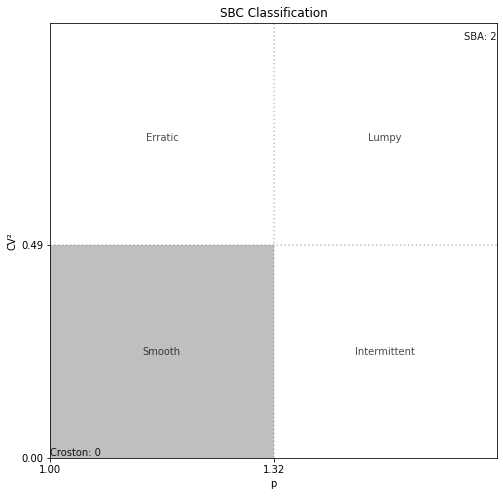

,target,p,CV Squared,model
0,FOODS_1_001_CA_1_evaluation,2.29078,0.554839,SBA
1,FOODS_1_001_CA_2_evaluation,1.94000,0.714545,SBA


In [23]:
out = sbc_class.sbc_class(test_data, plot_type = 'summary')
out

In [4]:
data_reformat = data.copy(deep=True)
data_reformat['unique_id'] = '1'
data_reformat.rename({"Date": "ds", "target_value": "y"}, axis=1, inplace=True)
data_reformat = data_reformat[['unique_id', 'ds', 'y']]
data_reformat

,unique_id,ds,y
0,1,2021-01-04,0
1,1,2021-01-11,0
2,1,2021-01-18,0
3,1,2021-01-25,0
4,1,2021-02-01,0
...,...,...,...
124,1,2023-05-22,0
125,1,2023-05-29,0
126,1,2023-06-05,0
127,1,2023-06-12,0


In [5]:
# models = [CrostonSBA(), CrostonClassic()]
# fcst = StatsForecast(df=data_reformat, models=models, freq='w', n_jobs=-1)
# fc_out = fcst.forecast(h=30).reset_index()
# fc_out

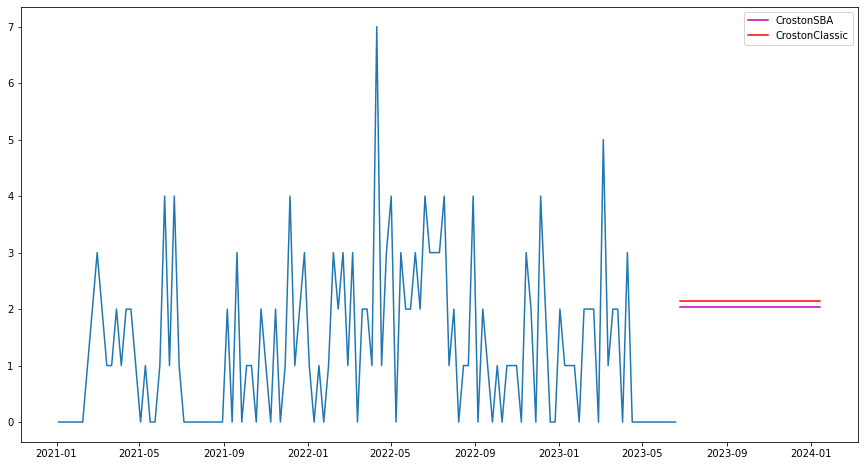

In [10]:
# plt.figure(figsize=(15,8))
# plt.plot(data_reformat['ds'], data_reformat['y'])
# plt.plot(fc_out['ds'], fc_input_df['CrostonSBA'], c = 'm', label = 'CrostonSBA')
# plt.plot(fc_input_df['ds'], fc_out['CrostonClassic'], c = 'r', label = 'CrostonClassic')
# plt.legend()
# plt.show()

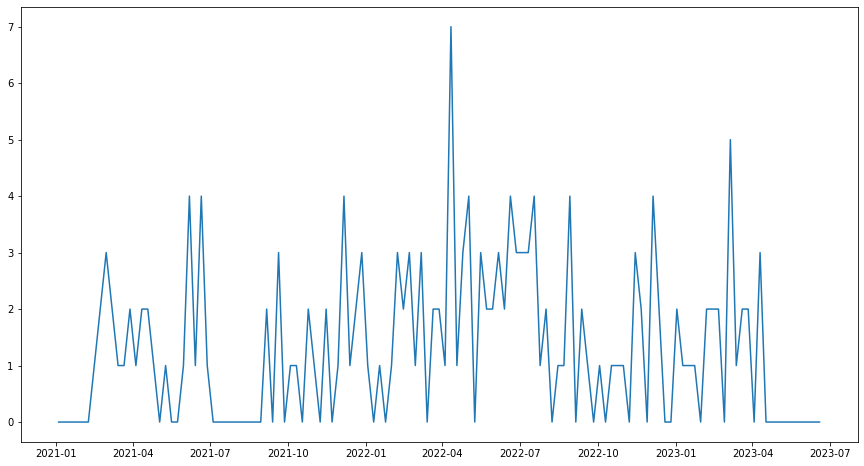

In [11]:
plt.figure(figsize=(15,8))
plt.plot(data['Date'], data['target_value'])
plt.show()

In [5]:
list1 = list(data['target_value'].values)

In [11]:
t1 = np.array(list1)
t1

array([0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1,
       4, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 1, 1, 0, 2, 1,
       0, 2, 0, 1, 4, 1, 2, 3, 1, 0, 1, 0, 1, 3, 2, 3, 1, 3, 0, 2, 2, 1,
       7, 1, 3, 4, 0, 3, 2, 2, 3, 2, 4, 3, 3, 3, 4, 1, 2, 0, 1, 1, 4, 0,
       2, 1, 0, 1, 0, 1, 1, 1, 0, 3, 2, 0, 4, 2, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 2, 0, 5, 1, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
nzd = np.where(t1 != 0)[0]
nzd

array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  18,  21,
        22,  23,  24,  25,  35,  37,  39,  40,  42,  43,  45,  47,  48,
        49,  50,  51,  52,  54,  56,  57,  58,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  88,  89,  91,  93,  94,  95,
        97,  98, 100, 101, 104, 105, 106, 107, 109, 110, 111, 113, 114,
       115, 116, 118])

In [13]:
k = len(nzd)
z = t1[nzd]
x = np.diff(nzd, prepend=-1)

In [23]:
z[8]

2

In [21]:
len(z)

81

In [24]:
np.std(z,ddof=1)

1.1808659722612234

In [ ]:
nzd = np.where(list1 != 0)[0]
k = len(nzd)
z = data[nzd]
x = np.diff(nzd, prepend=nzd[0])
p = np.mean(x)
v = (np.std(z) / np.mean(z)) ** 2

In [6]:
out = sbc_class.classify_series(list1, col_name=None).getModelUsed()
out

'SBA'

In [9]:
out2 = sbc_class.classify_series(data, col_name= 'target').getCoefficients()
out2

'p (demand interval), CV squared (coefficient of variation): [1.7746478873239437, 0.4260704330634399]'

In [10]:
out2 = sbc_class.classify_series(data, col_name= 'target').getModelUsed()
input_df2

'SBA'

In [8]:
data.shape

(129, 3)

In [175]:
class Result: 
    def __init__(self, p, v, model_use):
        self.p = p 
        self.v = v 
        self.model_use = model_use
    def getDemandInterval(self): 
        return self.p 
    def getCVSquared(self): 
        return self.v
    def getCoefficients(self):
        print(f'p (demand interval), CV squared (coefficient of variation): {[self.p, self.v]}')
        return [self.p, self.v]
    def getModelUse(self): 
        return self.model_use

In [176]:
def classify_series_helper(data, type ="SBC"): 
    # check if input data is an array/list, etc: 
    data = data[~np.isnan(data)]
    nzd = np.where(data != 0)[0]
    k = len(nzd)
    z = data[nzd]
    x = np.diff(nzd, prepend=-1)
    p = np.mean(x)
    v = (np.std(z, ddof=1) / np.mean(z)) ** 2

    if type == 'SBC': 
        if p > 1.32 or v < 0.49: 
            model_use = 'SBA'
        else: 
            model_use = 'Croston'
    else: 
        print("Unsupported classification type")
    return Result(p, v, model_use)

In [254]:
def create_dict_plot_helper(input_df): 
    d = {}
    d['Erratic'] = 0 
    d['Lumpy'] = 0
    d['Smooth'] = 0
    d['Intermittent'] = 0
    d['No group'] = 0
    if len(input_df) == 1: 
        if input_df['p'].values[0] >= 1.32:
            if input_df['CV Squared'].values[0] >= 0.49: 
                d['Lumpy'] = 1
            else: 
                d['Intermittent'] = 1
        elif input_df['p'].values[0] < 1.32: 
            if input_df['CV Squared'].values[0] >= 0.49: 
                d['Erratic'] = 1
            else: 
                d['Smooth'] = 1
        else: 
            d['No group'] = 1 
    else: 
        d['Erratic'] = input_df[(input_df['p'] < 1.32) & (input_df['CV squared'] >= 0.49)].target.nunique()
        d['Lumpy'] = input_df[(input_df['p'] >= 1.32) & (input_df['CV squared'] >= 0.49)].target.nunique()
        d['Smooth'] = input_df[(input_df['p'] < 1.32) & (input_df['CV squared'] < 0.49)].target.nunique()
        d['Intermittent'] = input_df[(input_df['p'] >= 1.32) & (input_df['CV squared'] < 0.49)].target.nunique()
        d['No group'] = input_df.target.nunique() - sum(d.values())
    return d 

In [255]:
def bar_plot(input_dict): 
    fig, ax = plt.subplots(figsize = (12,6))
    labels = ['Erratic', 'Lumpy', 'Smooth', 'Intermittent', 'No group']
    values = list(input_dict.values())

    bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    out = ax.bar(labels, values, color=bar_colors)
    ax.bar_label(out, labels = values, padding = 0.5)
    ax.set_ylabel('Number of demand patterns')
    ax.set_title('Number of demand patterns by category')
    return ax

def summary_plot(input_df): 
    sba_count = 0 
    croston_count = 0
    if len(input_df) == 1: 
        model = input_df['model'].values[0]
        if model == 'SBA': 
            sba_count = 1 
        else: 
            croston_count = 1
    else:
        sba_count = input_df[input_df['model'] == 'SBA']['target'].nunique()
        croston_count = input_df[input_df['model'] == 'Croston']['target'].nunique()
    fig,ax = plt.subplots(figsize = (8,8))
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((1,0), width = 0.64, height = 0.98, facecolor='none'))
    currentAxis.add_patch(Rectangle((1,0), width = 0.32, height = 0.49, facecolor='grey', alpha = 0.5))
    ax.set_yticks(np.arange(0, 0.98, 0.49))
    ax.set_xlim(1, 1.64)
    ax.set_xticks(np.arange(1, 1.64, 0.32))
    ax.axvline(x = 1.32, color = 'grey', alpha = 0.5, linestyle = 'dotted')
    ax.axhline(y = 0.49, color = 'grey', alpha = 0.5, linestyle = 'dotted')
    ax.text((1 + 1.32) /2, (0.49 + 0.98)/2, 'Erratic', ha = 'center', va = 'center', alpha = 0.7)
    ax.text((1.32 + 1.64) /2, (0.49 + 0.98)/2, 'Lumpy', ha = 'center', va = 'center', alpha = 0.7)
    ax.text(1.64, 0.98, f'SBA: {sba_count}', ha = 'right', va = 'top', alpha = 0.9)
    ax.text((1 + 1.32) /2, (0 + 0.49)/2, 'Smooth', ha = 'center', va = 'center', alpha = 0.7)
    ax.text(1, 0, f'Croston: {croston_count}', ha = 'left', va = 'bottom', alpha = 0.9)
    ax.text((1.32 + 1.64) /2, (0 + 0.49)/2, 'Intermittent', ha = 'center', va = 'center', alpha = 0.7)
    ax.set_ylabel("CV\u00b2")
    ax.set_xlabel("p")
    ax.set_title("SBC Classification")
    return ax

In [256]:
def sbc_class(data, type = 'SBC', plot_type = None):
    # check if input data is an array/list, etc: 
    p = [] 
    v = [] 
    model_use = [] 
    out_df = pd.DataFrame()
    if np.ndim(data) == 1 and not isinstance(data, pd.DataFrame): 
        if len(data) != 0: 
            target = np.array(data)
            target = target.reshape(len(target), -1)
            res = classify_series_helper(target, type)
            p.append(res.getDemandInterval())
            v.append(res.getCVSquared())
            model_use.append(res.getModelUse())
        else: 
            raise ValueError('Please check if data is empty')
    elif np.ndim(data) == 1 and isinstance(data, pd.DataFrame): 
        # assume the first column to be the target
        target = np.array(data.iloc[:, 0])
        res = classify_series_helper(target, type)
        p.append(res.getDemandInterval())
        v.append(res.getCVSquared())
        model_use.append(res.getModelUse())
    elif np.ndim(data) >1 and isinstance(data, pd.DataFrame): 
        target = data.to_numpy().T
        p = [] 
        v = [] 
        model_use = [] 
        out_df = pd.DataFrame()
        for i in range(target.shape[0]): 
            res = classify_series_helper(target[i], type)
            p.append(res.getDemandInterval())
            v.append(res.getCVSquared())
            model_use.append(res.getModelUse())
        out_df['target'] = data.columns.to_list()
        out_df['p'] = p 
        out_df['CV Squared'] = v 
        out_df['model'] = model_use
    else: 
        raise ValueError('Please pass in a list, an array or a dataframe')
    
    out_df['target'] = np.nan
    out_df['p'] = p 
    out_df['CV Squared'] = v 
    out_df['model'] = model_use

    if plot_type == 'bar': 
        d = create_dict_plot_helper(out_df)
        out_plot = bar_plot(d)
        plt.show()
    elif plot_type == 'summary': 
        out_plot = summary_plot(out_df)
        plt.show()
    elif plot_type is not None: 
        raise ValueError('Please pass in a correct type of plot')
    return out_df

In [268]:
a = 1
a

1

In [269]:
np.ndim(a)

0

In [270]:
out = sbc_class(a, plot_type=  'bar')
out

ValueError: Please pass in a list, an array or a dataframe

In [230]:
out['CV\u00b2'].values[0]

0.5548385576765917

In [137]:
sba_count = out[out['model'] == 'SBA']['target'].nunique()
croston_count = out[out['model'] == 'Croston']['target'].nunique()

In [44]:
d = {}
d['Erratic'] = out[(out['p'] < 1.32) & (out['CV squared'] >= 0.49)].target.nunique()
d['Lumpy'] = out[(out['p'] >= 1.32) & (out['CV squared'] >= 0.49)].target.nunique()
d['Smooth'] = out[(out['p'] < 1.32) & (out['CV squared'] < 0.49)].target.nunique()
d['Intermittent'] = out[(out['p'] >= 1.32) & (out['CV squared'] < 0.49)].target.nunique()
d['No group'] = out.target.nunique() - sum(d.values())

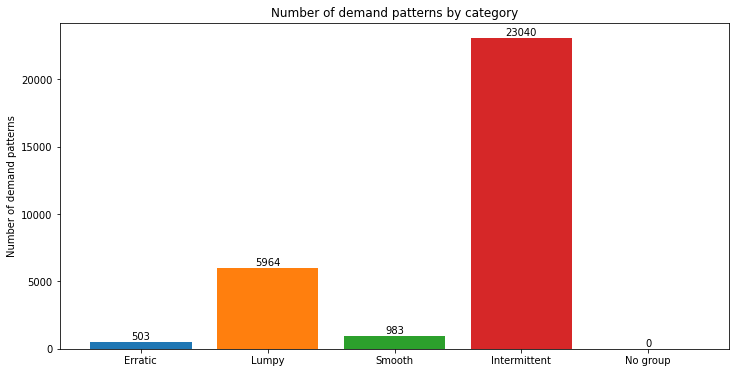

In [65]:
fig, ax = plt.subplots(figsize = (12,6))
labels = ['Erratic', 'Lumpy', 'Smooth', 'Intermittent', 'No group']
values = list(d.values())

bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

out = ax.bar(labels, values, color=bar_colors)
ax.bar_label(out, labels = values, padding = 0.5)
ax.set_ylabel('Number of demand patterns')
ax.set_title('Number of demand patterns by category')
plt.show()


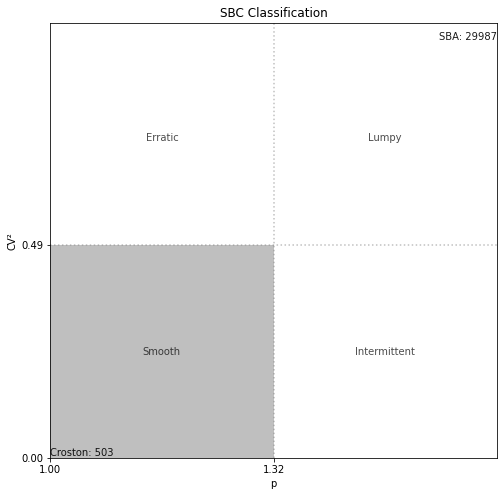

In [171]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize = (8,8))
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((1,0), width = 0.64, height = 0.98, facecolor='none'))
currentAxis.add_patch(Rectangle((1,0), width = 0.32, height = 0.49, facecolor='grey', alpha = 0.5))
ax.set_yticks(np.arange(0, 0.98, 0.49))
ax.set_xlim(1, 1.64)
ax.set_xticks(np.arange(1, 1.64, 0.32))
ax.axvline(x = 1.32, color = 'grey', alpha = 0.5, linestyle = 'dotted')
ax.axhline(y = 0.49, color = 'grey', alpha = 0.5, linestyle = 'dotted')
ax.text((1 + 1.32) /2, (0.49 + 0.98)/2, 'Erratic', ha = 'center', va = 'center', alpha = 0.7)
ax.text((1.32 + 1.64) /2, (0.49 + 0.98)/2, 'Lumpy', ha = 'center', va = 'center', alpha = 0.7)
ax.text(1.64, 0.98, f'SBA: {sba_count}', ha = 'right', va = 'top', alpha = 0.9)
ax.text((1 + 1.32) /2, (0 + 0.49)/2, 'Smooth', ha = 'center', va = 'center', alpha = 0.7)
ax.text(1, 0, f'Croston: {croston_count}', ha = 'left', va = 'bottom', alpha = 0.9)
ax.text((1.32 + 1.64) /2, (0 + 0.49)/2, 'Intermittent', ha = 'center', va = 'center', alpha = 0.7)
ax.set_ylabel("CV\u00b2")
ax.set_xlabel("p")
ax.set_title("SBC Classification")
plt.show()